# Forecasting Dengue Fever Challenge

_This notebook was originally created by John Adeojo. Please give credit to the originator if you intend to share this work_

Check out my [professional profile](https://www.john-adeojo.com/)

Want to work with me? Send me a message on [LinkedIn](https://www.linkedin.com/in/john-adeojo/)

This notebook is designed to be read along with the medium article 

_Date last updated: 11/03/2023_

In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import pandas as pd

In [131]:
from datetime import datetime, timedelta


def year_week_to_date(year, week):
    january_fourth = datetime(year, 1, 4)
    delta = timedelta(weeks=week-1, days=-january_fourth.weekday())
    return (january_fourth + delta).strftime('%Y-%m-%d')

# Import data from github

In [160]:
filename = 'https://github.com/john-adeojo/dengue-model/blob/master/data/01_raw/Iquitos%20(3).xlsx?raw=true'
import pandas as pd

ReanalysisHumidity = pd.read_excel(filename, sheet_name='ReanalysisHumidity', header=[0,1])
RanalysisTemp = pd.read_excel(filename, sheet_name='RanalysisTemp', header=[0,1])
SatellitePrecip = pd.read_excel(filename, sheet_name='SatellitePrecip', header=[0,1])
population = pd.read_csv('https://github.com/john-adeojo/dengue-model/raw/master/data/01_raw/Iquitos_Population_Data.csv')
satelliteveg = pd.read_csv('https://github.com/john-adeojo/dengue-model/raw/master/data/01_raw/iquitos_noqc.csv')
dengue_cases = pd.read_csv('https://raw.githubusercontent.com/john-adeojo/dengue-model/master/data/01_raw/Iquitos_Training_Data.csv')
dengue_cases['week_start_date'] = pd.to_datetime(dengue_cases['week_start_date'])
dengue_cases2 = dengue_cases[['week_start_date', 'total_cases', 'season_week']].copy()

ReanalysisHumidity.columns = ReanalysisHumidity.columns.map('_'.join)
RanalysisTemp.columns = RanalysisTemp.columns.map('_'.join)
SatellitePrecip.columns = SatellitePrecip.columns.map('_'.join)

ReanalysisHumidity.columns = [ReanalysisHumidity.strip() for ReanalysisHumidity in ReanalysisHumidity.columns]
RanalysisTemp.columns = [RanalysisTemp.strip() for RanalysisTemp in RanalysisTemp.columns]
SatellitePrecip.columns = [SatellitePrecip.strip() for SatellitePrecip in SatellitePrecip.columns]
satelliteveg.columns = [satelliteveg.strip() for satelliteveg in satelliteveg.columns]
satelliteveg.columns = [satelliteveg.strip() for satelliteveg in satelliteveg.columns]


ReanalysisHumidity.rename(columns={'iquitos_Year':'Year', '4S_ Month':'Month', '73W_ Day':'Day'}, inplace=True)
RanalysisTemp.rename(columns={'iquitos_Year':'Year', '4S_ Month':'Month', '73W_ Day':'Day'}, inplace=True)
SatellitePrecip.rename(columns={'iquitos_persiann_Year':'Year', '3.875S_ Month':'Month', '73.375W_ Day':'Day'}, inplace=True)

df_1 = ReanalysisHumidity.merge(right=RanalysisTemp, how='inner', left_on=['Year', 'Month', 'Day'], right_on=['Year', 'Month', 'Day'])
df_2 = df_1.merge(right=SatellitePrecip, how='inner', left_on=['Year', 'Month', 'Day'], right_on=['Year', 'Month', 'Day'])
df_2['date'] = pd.to_datetime(df_2['Year'].astype(str) + '-' + df_2['Month'].astype(str) + '-' + df_2['Day'].astype(str))



df_3 = df_2.merge(right=dengue_cases2, how='inner', left_on='date', right_on='week_start_date')
df_4 = df_3.merge(right=population, how='inner', left_on='Year', right_on='Year') 
df_5 = df_4.merge(right=satelliteveg, how='left', left_on=['Year', 'season_week'], right_on=['Year', 'Week'])
col = df_5.pop('total_cases')
df_5.insert(df_5.shape[1], 'total_cases', col)
df_5.drop(columns=['week_start_date', 'season_week', 'Day', 'precipitation_amount_ mm.1', 'specific_humidity_ g kg-1.1'], inplace=True)
df_5

C:\Users\johna\anaconda3\envs\dengue-modelling-2\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\johna\anaconda3\envs\dengue-modelling-2\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\johna\anaconda3\envs\dengue-modelling-2\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Year  Month  air_temperature_ K  dew_point_temperature_ K  \
0    2000      7              296.74                    295.77   
1    2000      7              295.92                    295.30   
2    2000      7              295.39                    290.60   
3    2000      7              296.30                    293.77   
4    2000      7              298.85                    291.53   
..    ...    ...                 ...                       ...   
462  2009      5              295.33                    295.10   
463  2009      6              294.19                    291.12   
464  2009      6              295.63                    295.00   
465  2009      6              297.80                    295.90   
466  2009      6              295.98                    295.42   

     relative_humidity_%  specific_humidity_ g kg-1  \
0                  94.92                      17.30   
1                  96.62                      16.87   
2                  75.68                      12.45   
3                  88.00                      15.30   
4                  65.25                      13.25   
..                   ...                        ...   
462                98.88                      16.62   
463                84.73                      12.90   
464                96.70                      16.50   
465                90.95                      17.41   
466                97.12                      17.04   

    specific_humidity_ g kg-1.1  minimum_air_temperature_ K  \
0                                                     294.6   
1                                                     293.0   
2                                                     291.0   
3                                                     292.8   
4                                                     291.1   
..                          ...                         ...   
462                                                   293.1   
463                                                   291.5   
464                                                   293.2   
465                                                   295.1   
466                                                   292.3   

     maximum_air_temperature_ K  precipitation_amount_kg m-2  ...  TAVG_K  \
0                         301.5                          6.3  ...  298.05   
1                         302.6                         11.2  ...  297.80   
2                         301.2                          0.0  ...  296.10   
3                         302.9                          1.7  ...  297.85   
4                         305.5                          0.0  ...  298.30   
..                          ...                          ...  ...     ...   
462                       298.7                          3.8  ...  295.90   
463                       300.0                          0.1  ...  295.75   
464                       299.3                          4.4  ...  296.25   
465                       304.2                          6.4  ...  299.65   
466                       303.2                          9.9  ...  297.75   

     precipitation_amount_ mm       date Estimated_population  Week  \
0                        8.73 2000-07-01               386666   1.0   
1                        1.02 2000-07-08               386666   2.0   
2                        0.00 2000-07-15               386666   3.0   
3                        0.00 2000-07-22               386666   4.0   
4                        7.72 2000-07-29               386666   5.0   
..                        ...        ...                  ...   ...   
462                      2.13 2009-05-28               441939  48.0   
463                      0.00 2009-06-04               441939  49.0   
464                      9.93 2009-06-11               441939  50.0   
465                      6.73 2009-06-18               441939  51.0   
466                     41.69 2009-06-25               441939  52.0   

     [-3.7508921

In [161]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Year                                   467 non-null    int64         
 1   Month                                  467 non-null    int64         
 2   air_temperature_ K                     467 non-null    float64       
 3   dew_point_temperature_ K               467 non-null    float64       
 4   relative_humidity_%                    467 non-null    float64       
 5   specific_humidity_ g kg-1              467 non-null    float64       
 6   specific_humidity_ g kg-1.1            467 non-null    object        
 7   minimum_air_temperature_ K             467 non-null    float64       
 8   maximum_air_temperature_ K             467 non-null    float64       
 9   precipitation_amount_kg m-2            467 non-null    float64   

In [114]:
.drop(columns=['week_start_date', 'season_week', 'Day'], inplace=True)

Year  Estimated_population
0   2000                386666
1   2001                393355
2   2002                399770
3   2003                405988
4   2004                412095
5   2005                418168
6   2006                424247
7   2007                430268
8   2008                436185
9   2009                441939
10  2010                447467
11  2011                452757
12  2012                457865
13  2013                462783
14  2014                467493

In [81]:
df_iq = iq_ReanalysisHumidity.merge(right=iq_RanalysisTemp, how='inner', left_on=['iquitos_Year', '4S_ Month', '73W_ Day'], right_on=['iquitos_Year', '4S_ Month', '73W_ Day'])

In [82]:
df_iq

iquitos_Year  4S_ Month  73W_ Day  air_temperature_ K  \
0              1979          1         1              297.56   
1              1979          1         2              297.78   
2              1979          1         3              297.30   
3              1979          1         4              297.36   
4              1979          1         5              297.18   
...             ...        ...       ...                 ...   
13249          2015          4        11              297.63   
13250          2015          4        12              297.20   
13251          2015          4        13              297.00   
13252          2015          4        14              298.41   
13253          2015          4        15              298.32   

       dew_point_temperature_ K  relative_humidity_%  \
0                        295.89                91.35   
1                        296.96                95.52   
2                        296.93                97.82   
3                        295.78                91.98   
4                        294.70                86.50   
...                         ...                  ...   
13249                    297.30                98.20   
13250                    296.70                97.45   
13251                    296.35                96.40   
13252                    296.42                90.38   
13253                    297.60                96.20   

       specific_humidity_ g kg-1 specific_humidity_ g kg-1.1  \
0                          17.45                               
1                          18.65                               
2                          18.55                               
3                          17.31                               
4                          16.41                               
...                          ...                         ...   
13249                      18.98                               
13250                      18.32                               
13251                      17.90                               
13252                      17.99                               
13253                      19.42                               

       minimum_air_temperature_ K  maximum_air_temperature_ K  \
0                           293.6                       305.5   
1                           295.2                       303.6   
2                           295.4                       302.4   
3                           293.2                       300.4   
4                           292.3                       304.1   
...                           ...                         ...   
13249                       295.8                       300.1   
13250                       295.9                       301.8   
13251                       295.4                       302.6   
13252                       294.8                       307.6   
13253                       295.2                       303.7   

       precipitation_amount_kg m-2  TDTR_K  TAVG_K  
0                              3.2    11.9  299.55  
1                             12.3     8.4  299.40  
2                             12.7     7.0  298.90  
3                              3.7     7.2  296.80  
4                              6.4    11.8  298.20  
...                            ...     ...     ...  
13249                         27.1     4.3  297.95  
13250                         10.3     5.9  298.85  
13251                          3.4     7.2  299.00  
13252                         11.9    12.8  301.20  
13253                         13.5     8.5  299.45  

[13254 rows x 13 columns]

In [2]:
url = 'https://raw.githubusercontent.com/john-adeojo/dengue-model/master/data/01_raw/dengue_features_train.csv'
train_features_df = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/john-adeojo/dengue-model/master/data/01_raw/dengue_features_test.csv'
test_features_df = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/john-adeojo/dengue-model/master/data/01_raw/dengue_labels_train.csv'
train_labels_df = pd.read_csv(url)

# Data Pre-Processing

In [3]:
df = train_features_df.merge(right=train_labels_df, left_on=['city', 'year', 'weekofyear'], right_on=['city', 'year', 'weekofyear'], how='left')
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
test_features_df['week_start_date'] = pd.to_datetime(test_features_df['week_start_date'])

df['weekofyear'] = df['weekofyear'].astype('object')
test_features_df['weekofyear'] = test_features_df['weekofyear'].astype('object')

# Quick EDA

In [4]:
import plotly.express as px
import plotly.io as pio
import os

def plot_time_series_Initial(df, title):
    # Drop rows with missing values
    df = df.dropna()
    
    # Plot the time series
    fig = px.line(df, x='week_start_date', y=['total_cases'],
                  labels={'week_start_date': 'Date', 'value': 'Total Dengue Cases'},
                  title=title)
    fig.update_traces(name='Actual Cases', selector=dict(name='total_cases'))
    fig.show()
    # filename = os.path.join(SAVE_DIR, f"{title}.png")
    # pio.write_image(fig, file=filename, format='png')
    
    
def plot_distribution(df, title):
    # Drop rows with missing values
    df = df.dropna(subset=["total_cases"])

    # Plot the distribution
    fig = px.histogram(df, x="total_cases", nbins=30,
                       labels={"total_cases": 'Total Dengue Cases', 'count': 'Frequency'},
                       title=title)
    fig.show()

    # Save the plot as an image
    # filename = os.path.join(SAVE_DIR, f"{title}.png")
    # pio.write_image(fig, file=filename, format='png')

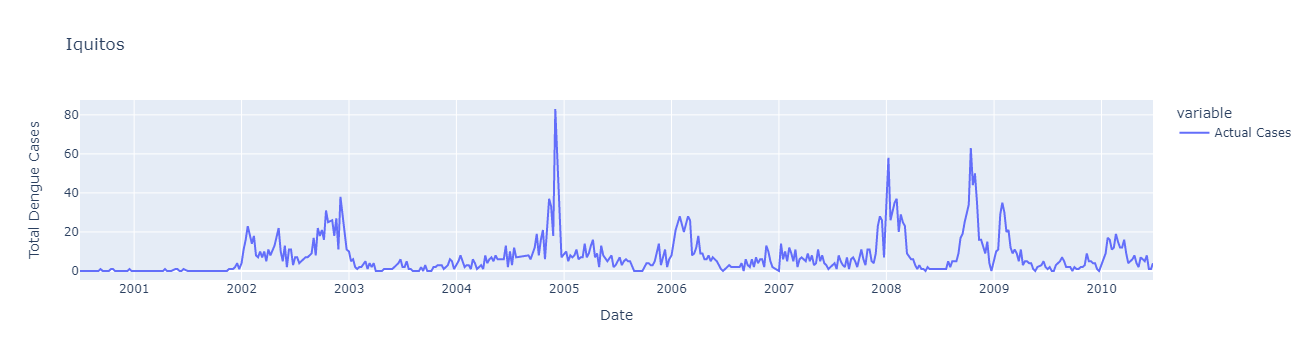

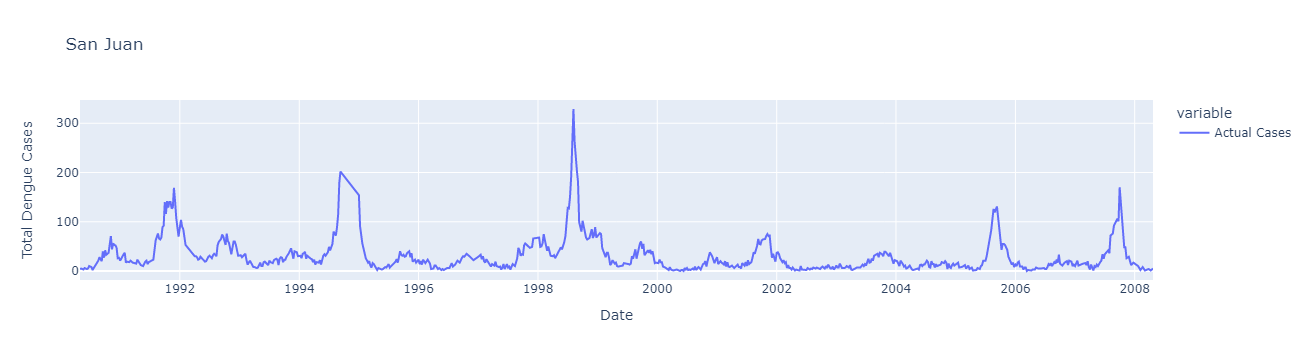

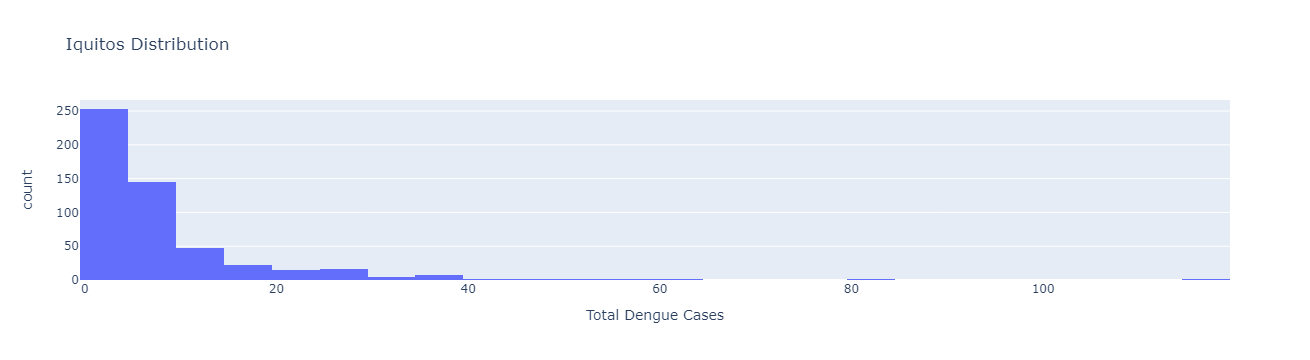

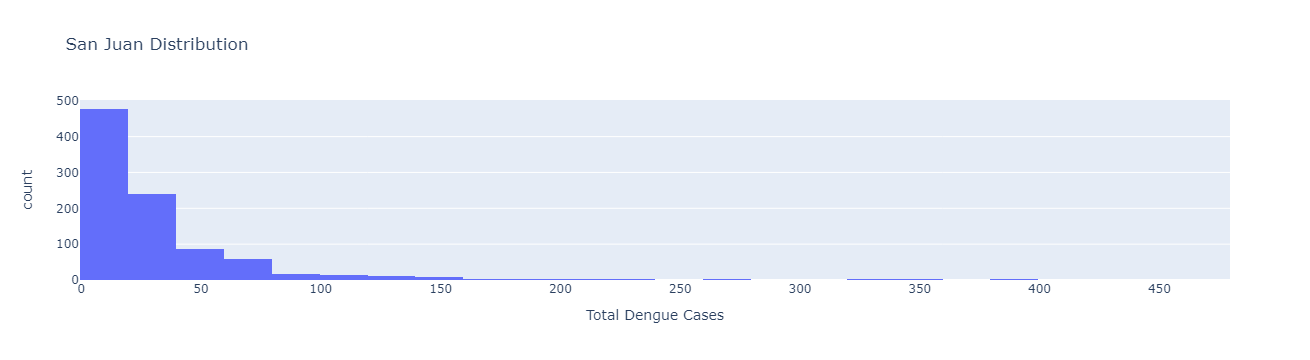

In [5]:
# SAVE_DIR = "C:/Users/johna/anaconda3/envs/dengue-modelling/dengue-model/data/08_reporting"

iq_df = df.loc[df["city"] == 'iq']
sj_df = df.loc[df["city"] == 'sj']

plot_time_series_Initial(df=iq_df, title="Iquitos")
plot_time_series_Initial(df=sj_df, title="San Juan")

plot_distribution(df=iq_df, title="Iquitos Distribution")
plot_distribution(df=sj_df, title="San Juan Distribution")

# Feature Engineering pipeline

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

class DataProcessor:
    def __init__(self, df_train, df_test, exclude_train, exclude_test, scaling, sj_date_split, iq_date_split):
        self.exclude_train = exclude_train
        self.exclude_test = exclude_test
        self.df_train_in = df_train.copy()
        self.df_test_in = df_test.copy()
        self.sj_date_split = sj_date_split
        self.iq_date_split = iq_date_split
        self.validation_set = None
        self.train_set = None
        self.test_set = None
        self.train_first = None
        self.test_first = None
        self.train_normalised = None
        self.validation_normalised = None
        self.test_normalised = None
        self.scaling = scaling
        self.train_standardised = None
        self.test_standardised = None
        self.validation_standardised = None
        self.train_encoded = None
        self.test_encoded = None
        self.test_encoded_cols = None
        self.train_encoded_cols = None
        self.validation_encoded_cols = None
        self.train_df = None
        self.test_df = None
        self.scaler = StandardScaler()
        self.encoder = OneHotEncoder()
        self.included_cols = None
                

                
    def validation_split(self):
        # Time series split 
        df_train_first = self.df_train_in[self.df_train_in.loc[date]]
     
        # Concatenate the train and validation sets for each city
        self.train_set = pd.concat([iq_train, sj_train], axis=0)
        self.validation_set = pd.concat([iq_validation, sj_validation], axis=0)
        self.test_set = self.df_test_first 
        
        print ("iq train split", iq_train.shape[0]/(iq_validation.shape[0] + iq_train.shape[0]))
        print ("sj train split", sj_train.shape[0]/(sj_validation.shape[0] + sj_train.shape[0]))
        
      
        
    def replace_na(self):
        
        # replace NAs in the training set
        num_cols = self.train_set.select_dtypes(include=['int', 'float']).columns.difference(self.exclude_train)
        means = self.train_set[num_cols].mean()
        self.train_set[num_cols] = self.train_set[num_cols].fillna(means)
        
        
        # replace NAs in the validation set
        num_cols = self.validation_set.select_dtypes(include=['int', 'float']).columns.difference(self.exclude_train)
        means = self.validation_set[num_cols].mean()
        self.validation_set[num_cols] = self.validation_set[num_cols].fillna(means)
        
        # replace NA in the test set 
        num_cols = self.test_set.select_dtypes(include=['int', 'float']).columns.difference(self.exclude_test)
        means = self.test_set[num_cols].mean()
        self.test_set[num_cols] = self.test_set[num_cols].fillna(means)
        
            
    def standardise_or_normalise(self):
        
        if self.scaling == "standardise":
            # standardise numeric variables in train set
            self.train_standardised = self.train_set.copy()
            numeric_cols = self.train_standardised.select_dtypes(include=np.number).columns.drop(["year", "total_cases"])
            self.scaler.fit(self.train_standardised[numeric_cols])
            self.train_standardised[numeric_cols] = self.scaler.transform(self.train_standardised[numeric_cols])

            # standardise numeric variables in validation set 
            self.validation_standardised = self.validation_set.copy()
            self.validation_standardised[numeric_cols] = self.scaler.transform(self.validation_standardised[numeric_cols])

            # standardise numeric variables in test set
            self.test_standardised = self.test_set.copy()
            self.test_standardised[numeric_cols] = self.scaler.transform(self.test_standardised[numeric_cols])
        

        if self.scaling == "normalise":
            # fit scaler on train
            scaler = MinMaxScaler()
            numeric_cols = self.train_set.select_dtypes(include=['int', 'float']).columns.difference(["year", "total_cases"])
            scaler.fit(self.train_set[numeric_cols])

            # normalise train
            self.train_normalise = self.train_set.copy()
            self.train_normalise[numeric_cols] = scaler.transform(self.train_set[numeric_cols])

            # normalise validation
            self.validation_normalise = self.validation_set.copy()
            self.validation_normalise[numeric_cols] = scaler.transform(self.validation_set[numeric_cols])

            # normalise test
            self.test_normalise = self.test_set.copy()
            self.test_normalise[numeric_cols] = scaler.transform(self.test_set[numeric_cols])
    

    
    def onehotencode(self):
        
        if self.scaling == 'standardise': 
            _train = self.train_standardised.copy()
            _test = self.test_standardised.copy()
            _validation = self.validation_standardised.copy()
            
        if self.scaling == 'normalise':
            _train = self.train_normalise.copy()
            _test = self.test_normalise.copy()
            _validation = self.validation_normalise.copy()
            
        if self.scaling == 'none':
            _train = self.train_set.copy()
            _test = self.test_set.copy()
            _validation = self.validation_set.copy()
        

        # fit one hot encoder on train set
        train_object_cols = _train.select_dtypes(include='object').columns.difference(['city'])
        self.encoder = OneHotEncoder(handle_unknown='ignore')
        self.encoder.fit(_train[train_object_cols])

        # apply one hot encoding on train set
        self.train_encoded_cols = pd.DataFrame(
            self.encoder.transform(_train[train_object_cols]).toarray(),
            columns=self.encoder.get_feature_names_out(train_object_cols),
            index=_train.index
        )
        
        self.train_encoded = _train.drop(columns=train_object_cols).merge(right=self.train_encoded_cols, how='left', left_index=True, right_index=True)

        # apply one hot encoding on test set
        test_object_cols = _test.select_dtypes(include='object').columns.difference(['city'])
        self.test_encoded_cols = pd.DataFrame(
            self.encoder.transform(_test[test_object_cols]).toarray(),
            columns=self.encoder.get_feature_names_out(test_object_cols),
            index=_test.index
        )
        
        self.test_encoded = _test.drop(columns=test_object_cols).merge(right=self.test_encoded_cols, how='left', left_index=True, right_index=True)

        # apply one hot encoding on validatiom set
        validation_object_cols = _validation.select_dtypes(include='object').columns.difference(['city'])
        self.validation_encoded_cols = pd.DataFrame(
            self.encoder.transform(_validation[validation_object_cols]).toarray(),
            columns=self.encoder.get_feature_names_out(validation_object_cols),
            index=_validation.index
        )
        
        self.validation_encoded = _validation.drop(columns=validation_object_cols).merge(right=self.validation_encoded_cols, how='left', left_index=True, right_index=True)
        
        self.train_df = self.train_encoded
        self.validation_df = self.validation_encoded
        self.test_df = self.test_encoded
        
            
    def process_data(self):
        self.add_total_cases_3yr_lag()
        self.validation_split()
        self.replace_na()
        self.standardise_or_normalise()
        self.onehotencode()
        self.train_df.sort_values(by="week_start_date", ascending=True, inplace=True)

        return self.train_df, self.validation_df, self.test_df


# Model Training

In [7]:
# Helper functions 
def generate_uniform_distribution(min_val, max_val, size=1, seed=19):
    # create a uniform distribution object
    dist = uniform(loc=min_val, scale=max_val-min_val)
    return dist

def plot_joint_distribution(data, var1, var2, title):
    df = pd.DataFrame({var1: data[var1], var2: data[var2] *-1})
    fig = px.scatter(df, x=var1, y=var2, marginal_x="histogram", marginal_y="histogram", title=title)
    fig.show()
    # filename = os.path.join(SAVE_DIR, f"{title}.png")
    # pio.write_image(fig, file=filename, format='png')
    
def plot_time_series(df, title):
    # Drop rows with missing values
    df = df.dropna()
    
    # Plot the time series
    fig = px.line(df, x='week_start_date', y=['total_cases', 'predicted_cases'],
                  labels={'week_start_date': 'Date', 'value': 'Total Dengue Cases'},
                  title=title)
    fig.update_traces(name='Actual Cases', selector=dict(name='total_cases'))
    fig.update_traces(name='Forecasted Cases', selector=dict(name='predicted_cases'))
    fig.show()
    # filename = os.path.join(SAVE_DIR, f"{title}.png")
    # pio.write_image(fig, file=filename, format='png')
    

In [48]:
# Set up function for modelling
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_absolute_error


def train_model(dataset_dict, estimator, model_name, regularisation, param_distributions):
    

    df_train = dataset_dict.get('train').copy()
    df_validation = dataset_dict.get('validation').copy()
    train_iq = df_train.copy().loc[df_train["city"] == "iq"]
    train_sj = df_train.copy().loc[df_train["city"] == "sj"]
    
    # Set up data sets for modelling - Model for cities iq and sj seprately
    drop_cols = ["total_cases", "week_start_date", "year", "city"]
    X_train_iq = train_iq.drop(columns=drop_cols)
    y_train_iq = train_iq["total_cases"]
    X_train_sj = train_sj.drop(columns=drop_cols)
    y_train_sj = train_sj["total_cases"]

    # Prediction data: combines test and validation for plotting time series.
    prediction_set = pd.concat([df_validation, df_train], axis=0, ignore_index=False)
    prediction_set_iq = prediction_set.copy().loc[prediction_set["city"]=='iq']
    prediction_set_sj = prediction_set.copy().loc[prediction_set["city"]=='sj']
    
    prediction_set_iq.sort_values(by='week_start_date', ascending=True, inplace=True)
    prediction_set_sj.sort_values(by='week_start_date', ascending=True, inplace=True)
    
    X_predict_iq = prediction_set_iq.drop(columns=drop_cols)
    X_predict_sj = prediction_set_sj.drop(columns=drop_cols)
    
    # Validation sets:
    validation_set_iq = df_validation.copy().loc[df_validation["city"]=='iq']
    validation_set_sj = df_validation.copy().loc[df_validation["city"]=='sj']
    
    X_validation_iq = validation_set_iq.drop(columns=drop_cols)
    X_validation_sj = validation_set_sj.drop(columns=drop_cols)
    
    y_validation_actual_iq = validation_set_iq['total_cases']
    y_validation_actual_sj = validation_set_sj['total_cases']
    
    
    args={
    "n_splits":5
    }

    random_search_kwargs = {
        "estimator": estimator,
        "param_distributions": param_distributions,
        "n_iter": 500,
        "scoring": "neg_mean_absolute_error",
        "cv": TimeSeriesSplit(**args)

    }

    # Train model for iq
    train_model_iq = RandomizedSearchCV(**random_search_kwargs)
    train_model_iq.fit(X_train_iq, y_train_iq)
    best_model_iq = train_model_iq.best_estimator_


    # Train model for sj
    train_model_sj = RandomizedSearchCV(**random_search_kwargs)
    train_model_sj.fit(X_train_sj, y_train_sj)
    best_model_sj = train_model_sj.best_estimator_

    # Output fit metrics 
    data = train_model_iq.cv_results_
    var1 = f"param_{regularisation}"
    var2 = "mean_test_score"
    title= f" Iq-{model_name}- Param vs std MAE"
    plot_joint_distribution(data, var1, var2, title)
    
    # Output fit metrics 
    data = train_model_sj.cv_results_
    var1 = f"param_{regularisation}"
    var2 = "mean_test_score"
    title= f" Sj-{model_name}- Param vs std MAE"
    plot_joint_distribution(data, var1, var2, title)
    
    # print MAE
    y_pred = train_model_iq.predict(X_validation_iq)
    y_true = y_validation_actual_iq
    mae = mean_absolute_error(y_true, y_pred)
    print('Validation set: Mean Absolute Error Iq:', mae)
    
    y_pred = train_model_sj.predict(X_validation_sj)
    y_true = y_validation_actual_sj
    mae = mean_absolute_error(y_true, y_pred)
    print('Validation set: Mean Absolute Error Sj:', mae)

    # Visualise Model against past data     
    prediction_set_iq["predicted_cases"] = train_model_iq.predict(X_predict_iq)
    prediction_set_sj["predicted_cases"] = train_model_sj.predict(X_predict_sj)
    
    plot_time_series(df=prediction_set_iq, title=f"Iq-{model_name} actuals vs model")
    plot_time_series(df=prediction_set_sj, title=f"Sj-{model_name} actuals vs model")
    
    return train_model_iq, train_model_sj


# Ridge Regressor

In [49]:
exclude_train = ["year", "total_cases", "week_start_date", "city"]
exclude_test = ["year", "week_start_date", "city"]

dp = DataProcessor(
    df_train=df, 
    df_test=test_features_df, 
    exclude_test=exclude_test, 
    exclude_train=exclude_train,
    scaling = 'standardise',
    iq_date_split = '2008-09-30',
    sj_date_split = '2004-07-30'
)

train_df, validation_df, test_df = dp.process_data()

iq train split 0.7527472527472527
sj train split 0.7525510204081632


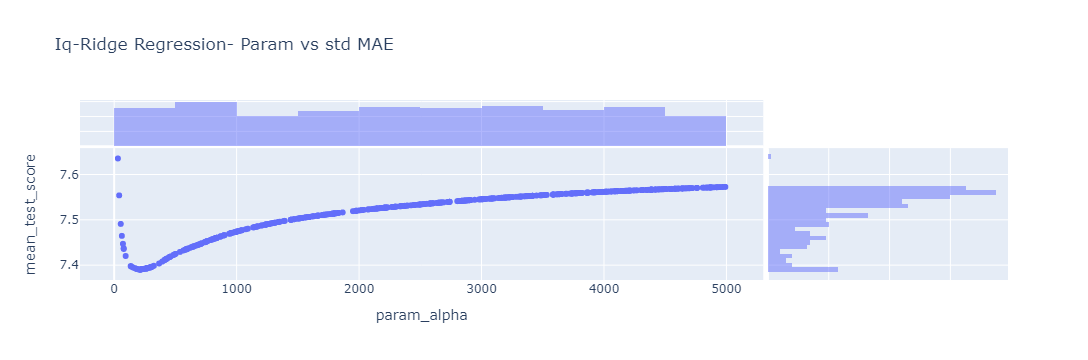

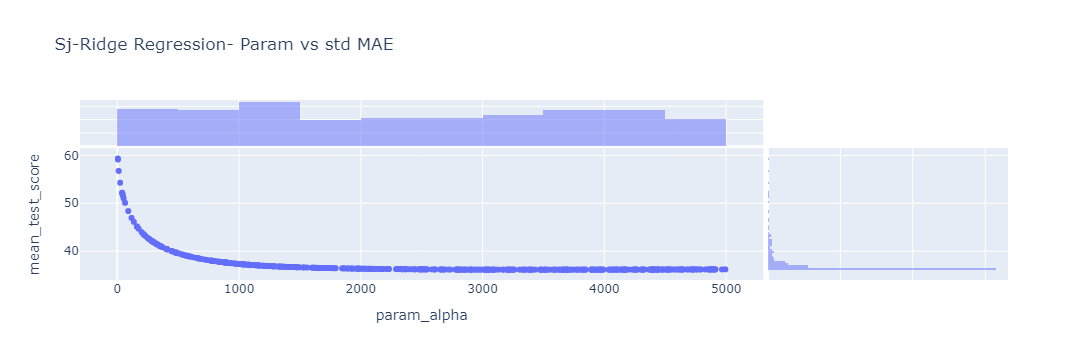

Validation set: Mean Absolute Error Iq: 6.9983280085681105
Validation set: Mean Absolute Error Sj: 23.650438922173016


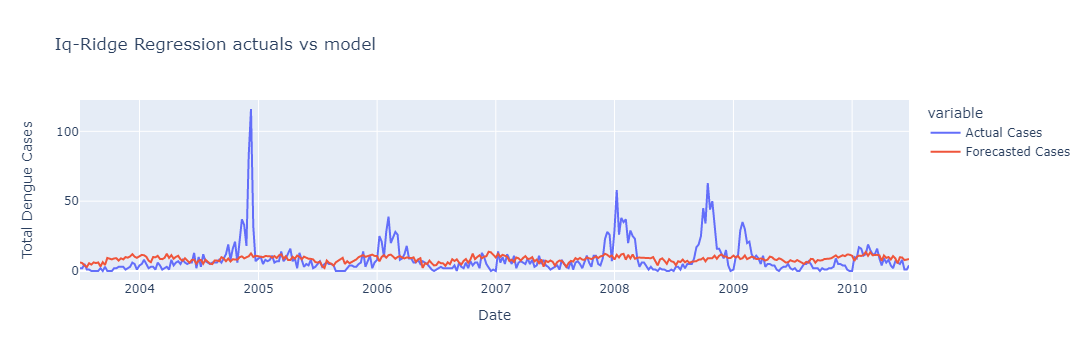

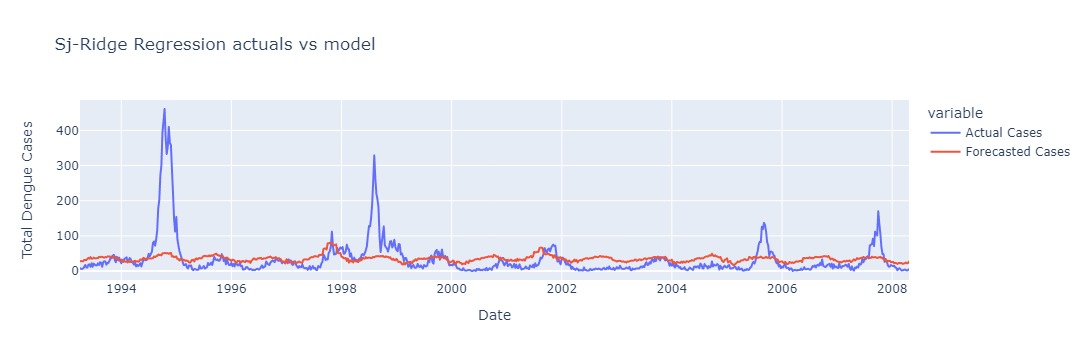

In [50]:
from sklearn.linear_model import Ridge

dataset_dict = {
    'train': train_df,
    'validation': validation_df
}

esitmator = Ridge()
model_name = 'Ridge Regression'
regularisation = 'alpha'
param_distributions = {regularisation: generate_uniform_distribution(min_val=1, max_val=5000)}

ridge_model_iq, ridge_model_sj = train_model(
    dataset_dict=dataset_dict, 
    estimator=esitmator, 
    model_name=model_name, 
    regularisation=regularisation,
    param_distributions=param_distributions
)

# XGBoost Regressor: With Poission objective

In [11]:
exclude_train = ["year", "total_cases", "week_start_date", "city"]
exclude_test = ["year", "week_start_date", "city"]

dp = DataProcessor(
    df_train=df, 
    df_test=test_features_df, 
    exclude_test=exclude_test, 
    exclude_train=exclude_train,
    scaling = 'none',
    iq_date_split = '2008-09-30',
    sj_date_split = '2004-07-30'
)

train_df, validation_df, test_df = dp.process_data()

iq train split 0.7527472527472527
sj train split 0.7525510204081632


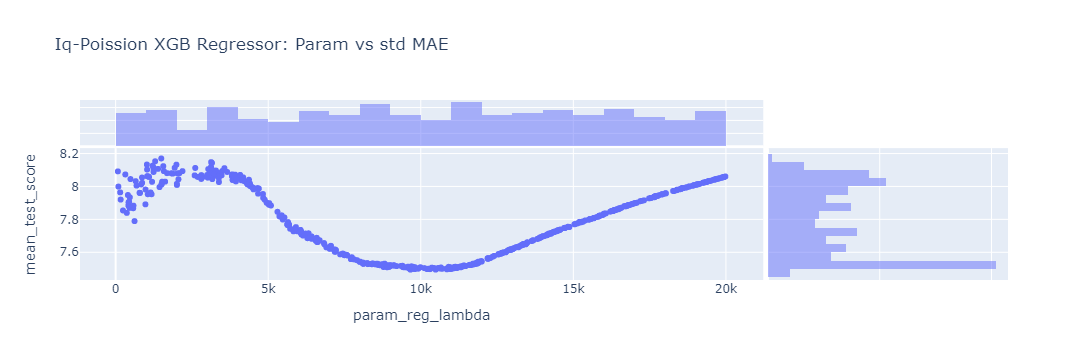

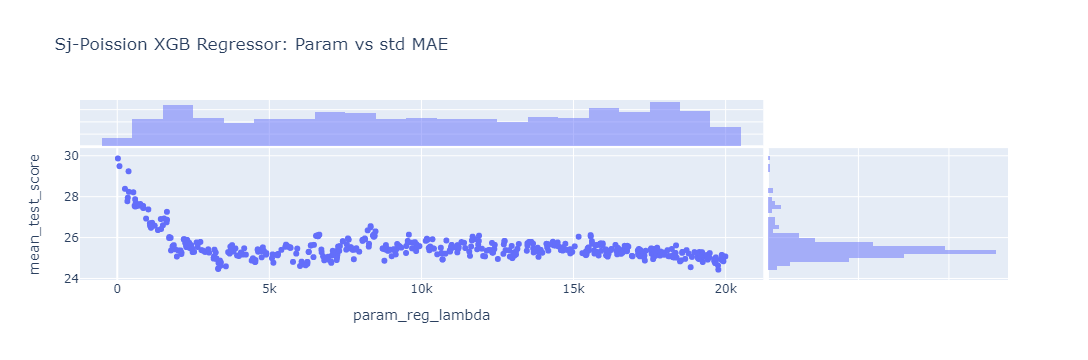

Validation set: Mean Absolute Error Iq: 7.784661446677314
Validation set: Mean Absolute Error Sj: 18.50516243816651


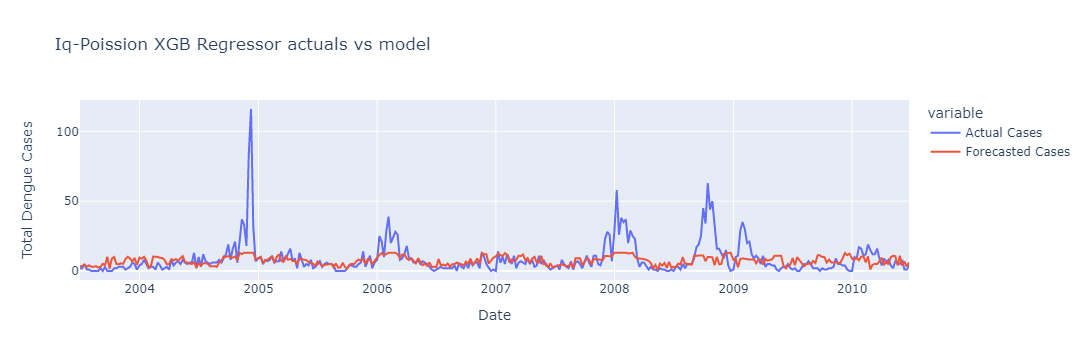

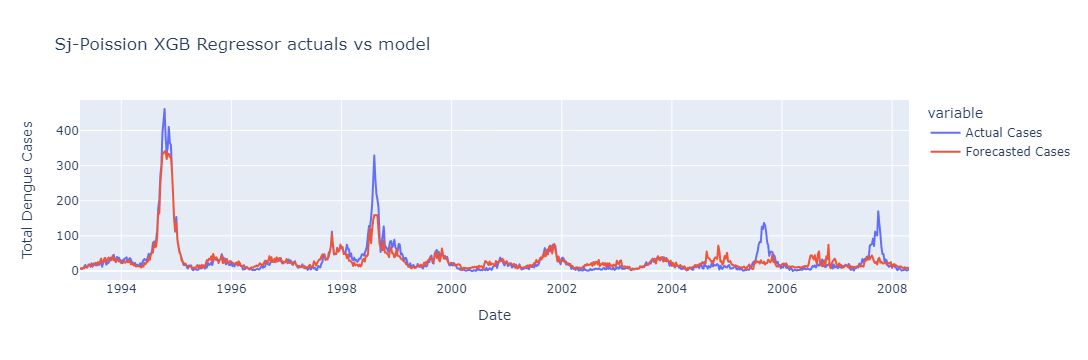

In [12]:
from xgboost import XGBRegressor

dataset_dict = {
    'train': train_df,
    'validation': validation_df
}

esitmator = XGBRegressor(objective='count:poisson')
model_name = 'Poission XGB Regressor'
regularisation = 'reg_lambda'
param_distributions = {regularisation: generate_uniform_distribution(min_val=1, max_val=20000)}

poission_xgb_model_iq, poission_xgb_model_sj = train_model(
    dataset_dict=dataset_dict, 
    estimator=esitmator, 
    model_name=model_name, 
    regularisation=regularisation,
    param_distributions=param_distributions
)

# XGBoost Regressor: With MAE objective

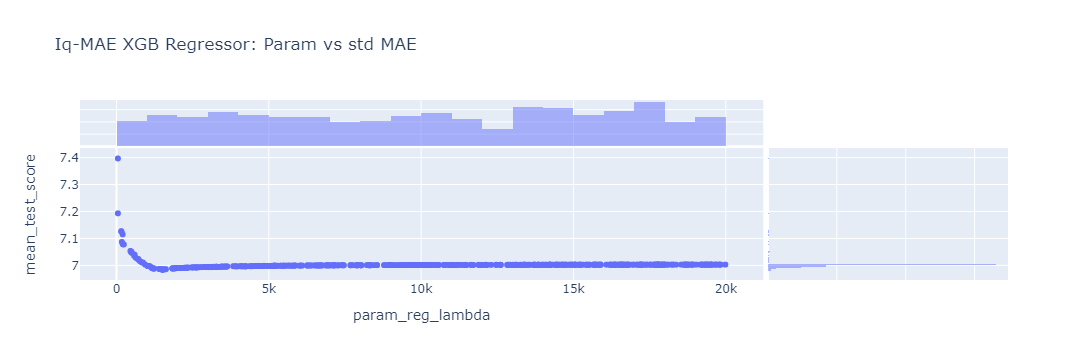

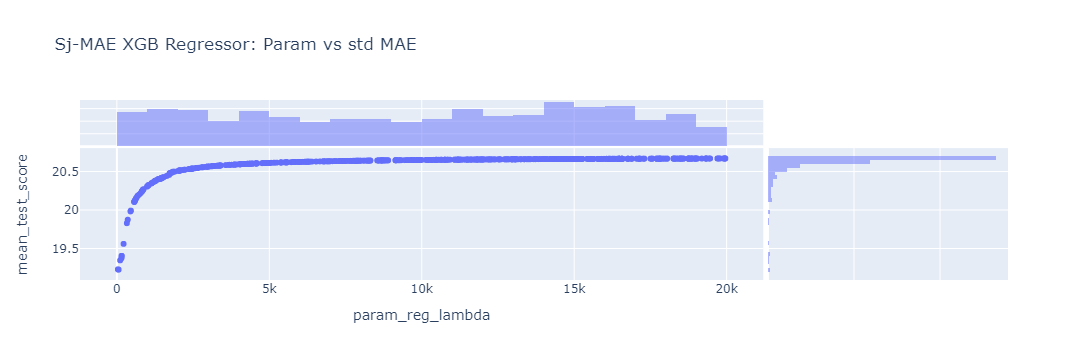

Validation set: Mean Absolute Error Iq: 6.976486100090875
Validation set: Mean Absolute Error Sj: 16.88536069811005


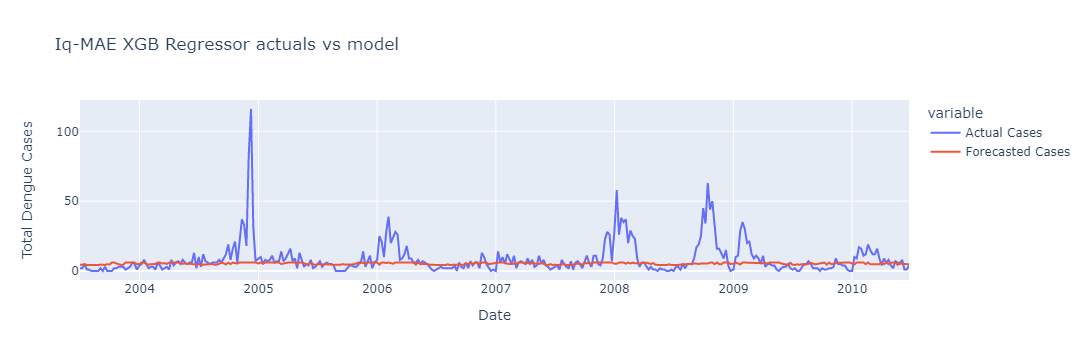

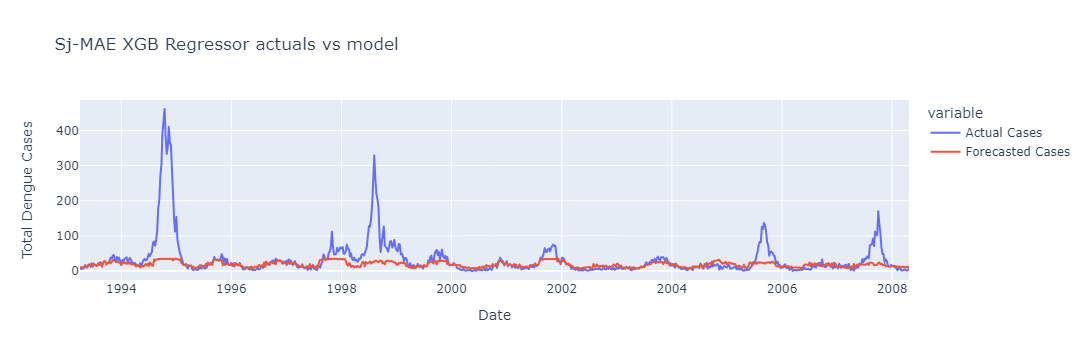

In [13]:
dataset_dict = {
    'train': train_df,
    'validation': validation_df
}

esitmator = XGBRegressor(objective='reg:absoluteerror')
model_name = 'MAE XGB Regressor'
regularisation = 'reg_lambda'
param_distributions = {regularisation: generate_uniform_distribution(min_val=1, max_val=20000)}

abs_xgb_model_iq, abs_xgb_model_sj = train_model(
    dataset_dict=dataset_dict, 
    estimator=esitmator, 
    model_name=model_name, 
    regularisation=regularisation,
    param_distributions=param_distributions
)

# XGBoost Regressor: With MSE error objective

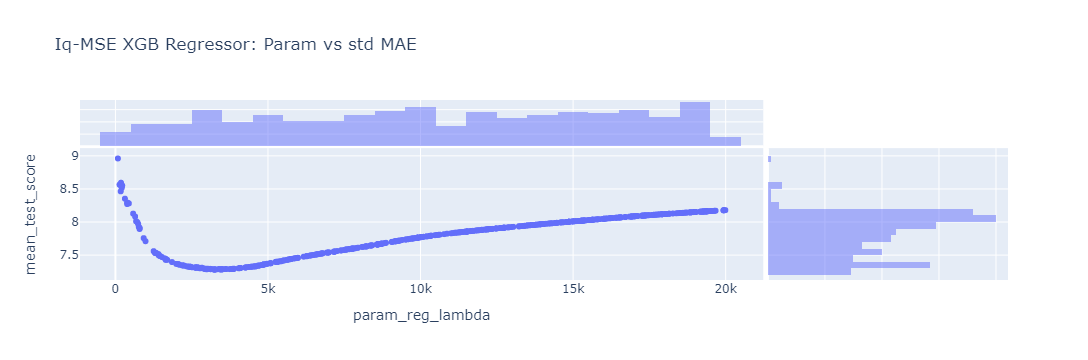

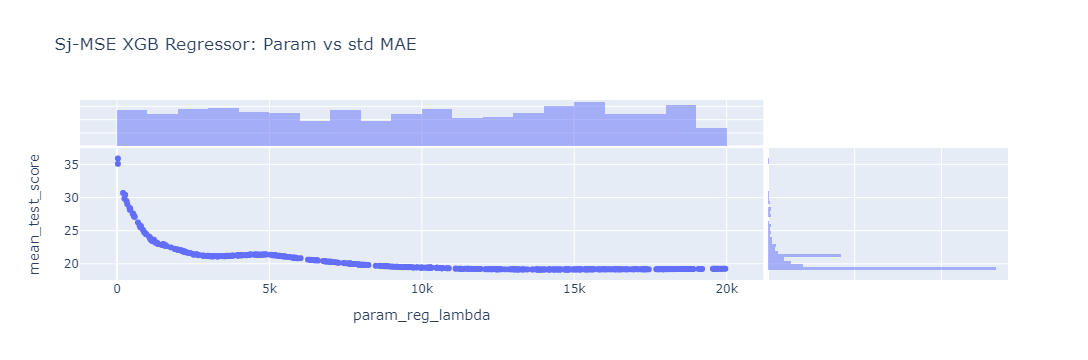

Validation set: Mean Absolute Error Iq: 7.323326004876031
Validation set: Mean Absolute Error Sj: 18.486642360687256


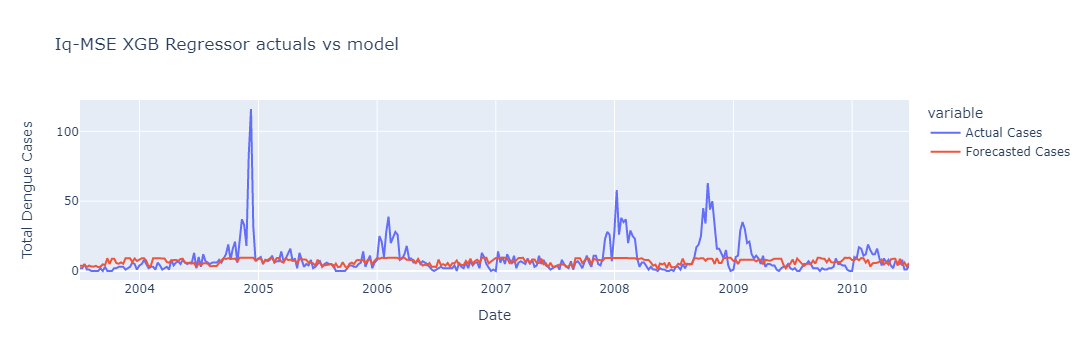

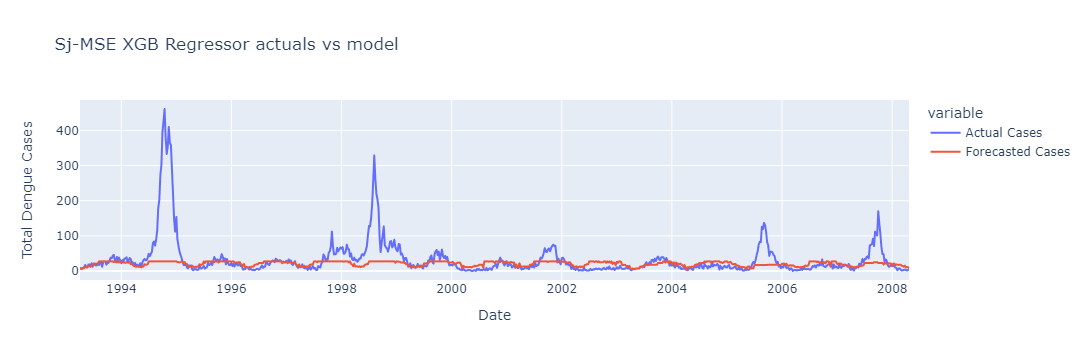

In [14]:
dataset_dict = {
    'train': train_df,
    'validation': validation_df
}

esitmator = XGBRegressor(objective='reg:squarederror')
model_name = 'MSE XGB Regressor'
regularisation = 'reg_lambda'
param_distributions = {regularisation: generate_uniform_distribution(min_val=1, max_val=20000)}

hub_xgb_model_iq, hub_xgb_model_sj = train_model(
    dataset_dict=dataset_dict, 
    estimator=esitmator, 
    model_name=model_name, 
    regularisation=regularisation,
    param_distributions=param_distributions
)

# XGBoost Regressor: with MSE objective

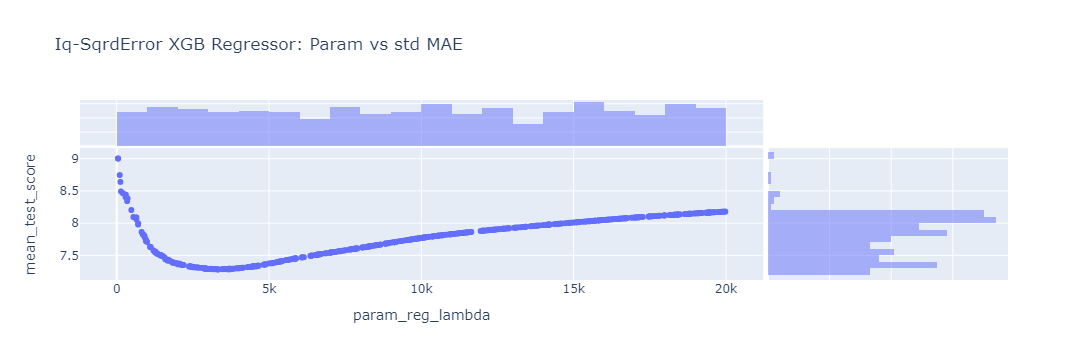

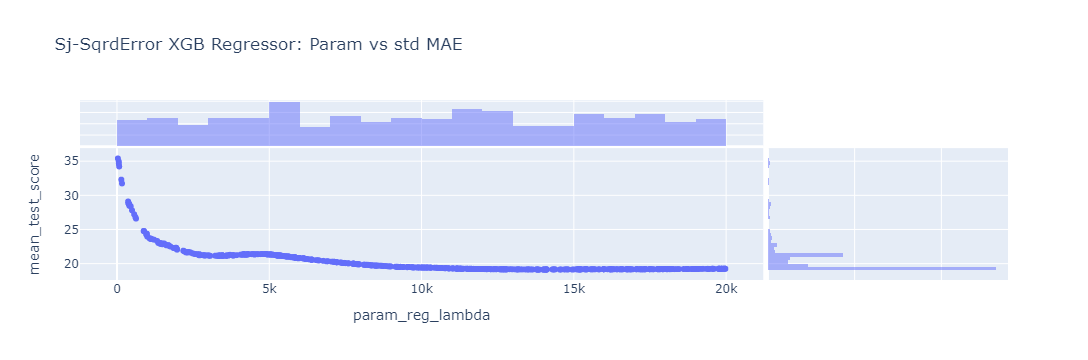

Validation set: Mean Absolute Error Iq: 7.299998863538106
Validation set: Mean Absolute Error Sj: 18.487161218505545


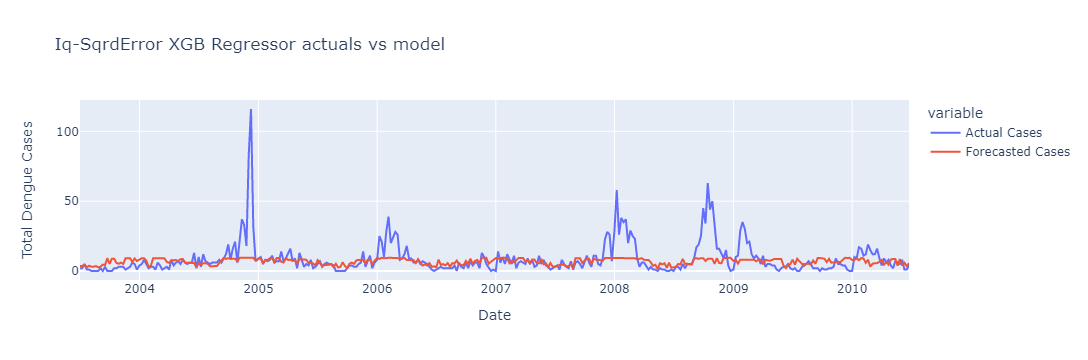

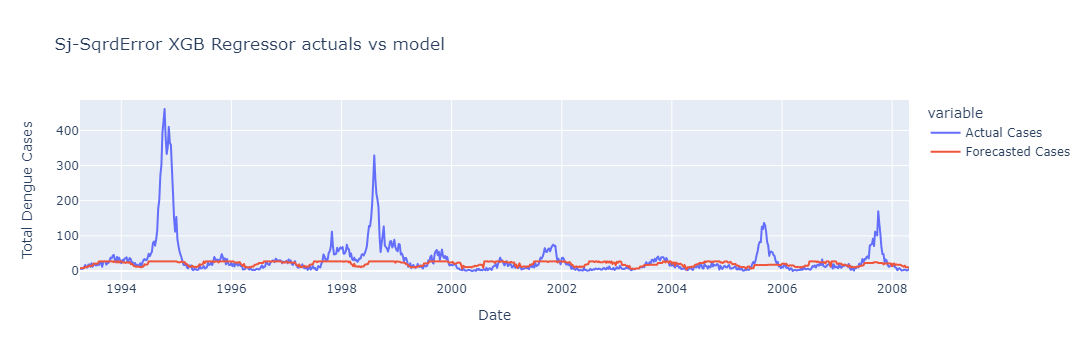

In [15]:
dataset_dict = {
    'train': train_df,
    'validation': validation_df
}

esitmator = XGBRegressor(objective='reg:squarederror')
model_name = 'SqrdError XGB Regressor'
regularisation = 'reg_lambda'
param_distributions = {regularisation: generate_uniform_distribution(min_val=1, max_val=20000)}

sqlog_xgb_model_iq, sqlog_xgb_model_sj = train_model(
    dataset_dict=dataset_dict, 
    estimator=esitmator, 
    model_name=model_name, 
    regularisation=regularisation,
    param_distributions=param_distributions
)

# Model Prediction

In [45]:
# Predict on Test
test_data = test_df.copy()
week_of_year = dp.test_set['weekofyear']
exclude_test_sub = exclude_test.append('weekofyear')

test_sub = test_data.merge(right=week_of_year, how='left', right_index=True, left_index=True)

test_df_iq = test_sub.loc[test_sub["city"] == 'iq'].copy()
test_df_sj = test_sub.loc[test_sub["city"] == 'sj'].copy()
X_test_iq = test_df_iq.drop(columns=exclude_test)
X_test_sj = test_df_sj.drop(columns=exclude_test)

test_df_iq['total_cases'] = sqlog_xgb_model_iq.predict(X_test_iq)
test_df_sj['total_cases'] = sqlog_xgb_model_sj.predict(X_test_sj)

test_df_iq['total_cases'] = round(test_df_iq['total_cases']).astype(int)
test_df_sj['total_cases'] = round(test_df_sj['total_cases']).astype(int)

keep = ['city', 'year', 'weekofyear', 'total_cases']

submission = pd.concat([test_df_iq[keep], test_df_sj[keep]], axis=0)

In [46]:
submission_df = submission.sort_values(by=['city', 'year'], ascending=[False, True])
submission_df

city  year weekofyear  total_cases
0     sj  2008         18           12
1     sj  2008         19           11
2     sj  2008         20           13
3     sj  2008         21           13
4     sj  2008         22           13
..   ...   ...        ...          ...
411   iq  2013         22            9
412   iq  2013         23            4
413   iq  2013         24            3
414   iq  2013         25            5
415   iq  2013         26            3

[416 rows x 4 columns]

In [47]:
# submission_df.to_csv(r"C:\Users\johna\anaconda3\envs\dengue-modelling\dengue-model\data\07_model_output\submission_mse.csv", index=False)